# Example with Sensitivity Analysis

Basic: 
```python
method_name="add_unobserved_common_cause"
```

In [2]:
# Imports
import pandas as pd
from dowhy import CausalModel
import warnings
import numpy as np

warnings.filterwarnings("ignore", category=FutureWarning)

## Trying out on [Balke-Pearl](https://drive.google.com/drive/folders/1mLHLrXJI1-z0eMy68Bkljw4gdDImSm0q) example

### Data and Modeling

In [3]:
df = pd.read_csv("../../data/balke_pearl.csv")
df.head()

,Z,X,Y
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


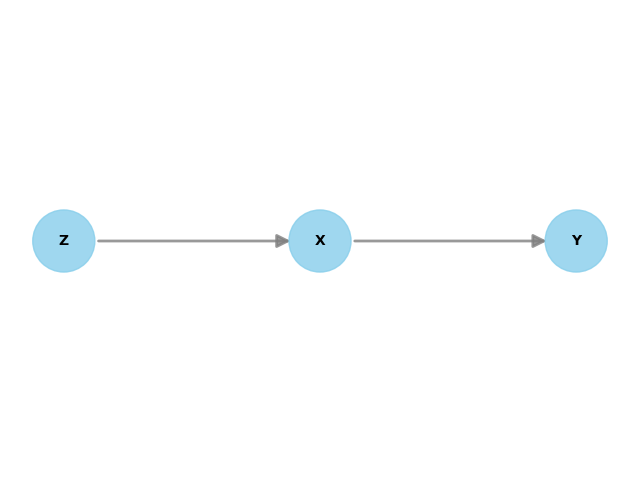

In [4]:
# Step 1: Model
model = CausalModel(
    data=df,
    treatment='X',
    outcome='Y',
    instruments=['Z']
)

model.view_model()

### Identifying

In [5]:
# Step 2: Identify
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                   -1⎤
 ⎢ d      ⎛ d       ⎞  ⎥
E⎢────(Y)⋅⎜────([X])⎟  ⎥
 ⎣d[Z]    ⎝d[Z]     ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→Y then ¬(U →→{Z})
Estimand assumption 2, Exclusion: If we remove {Z}→{X}, then ¬({Z}→Y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimation

In [6]:
# Step 3: Estimate
# Choose the first estimand: using the backdoor criterion
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    test_significance=True,
    confidence_intervals=True
)

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
 d        
────(E[Y])
d[X]      
Estimand assumption 1, Unconfoundedness: If U→{X} and U→Y then P(Y|X,,U) = P(Y|X,)

## Realized estimand
b: Y~X
Target units: ate

## Estimate
Mean value: 0.23544231631810425
p-value: [6.2290416e-14]
95.0% confidence interval: [[0.17474776 0.29613687]]



## Refutation

[-0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1 -0.   0.1  0.2  0.3  0.4  0.5
  0.6  0.7]


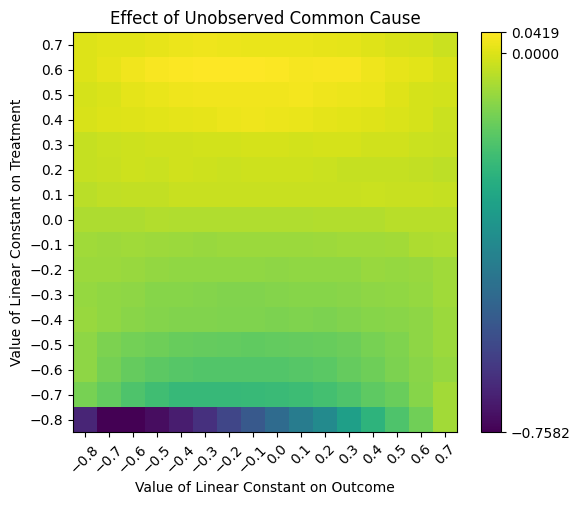

Values in range [-0.23, -0.15] are:
Value: -0.182384896552099, Position: O:0.5, T:-0.8
Value: -0.15052626999210722, Position: O:-0.7, T:-0.7
Value: -0.18190062864188372, Position: O:-0.6, T:-0.7
Value: -0.2030773835180006, Position: O:-0.5, T:-0.7
Value: -0.22065682058948294, Position: O:-0.4, T:-0.7
Value: -0.2223831805511895, Position: O:-0.3, T:-0.7
Value: -0.2228148990426922, Position: O:-0.2, T:-0.7
Value: -0.2189786134165253, Position: O:-0.1, T:-0.7
Value: -0.21659216162411843, Position: O:-0.0, T:-0.7
Value: -0.20856169135801134, Position: O:0.1, T:-0.7
Value: -0.1970643826874362, Position: O:0.2, T:-0.7
Value: -0.1831246600391377, Position: O:0.3, T:-0.7
Value: -0.15784783357468607, Position: O:0.4, T:-0.7
Value: -0.15972633493780392, Position: O:-0.5, T:-0.6
Value: -0.16763908243535508, Position: O:-0.4, T:-0.6
Value: -0.1750291301052131, Position: O:-0.3, T:-0.6
Value: -0.17387367043922464, Position: O:-0.2, T:-0.6
Value: -0.17652288726112325, Position: O:-0.1, T:-0.6
Value:

In [30]:
# Step 4: Refute (sensitivity analysis)
strength_list = np.arange(-0.8, 0.8, 0.1).round(1)
print(strength_list)

ref = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="add_unobserved_common_cause",
    confounders_effect_on_treatment="linear",
    confounders_effect_on_outcome="linear",
    effect_strength_on_treatment=strength_list,
    effect_strength_on_outcome=strength_list
)

# Find values in the range [-0.23, -0.15]
matrix = ref.new_effect_array
values_in_range = np.where((matrix >= -0.23) & (matrix <= -0.15))
values = matrix[values_in_range]
positions = list(zip(values_in_range[0], values_in_range[1]))
print(f"Values in range [-0.23, -0.15] are:")
for value, pos in zip(values, positions):
    pos = list(map(lambda pos: strength_list[pos], pos))
    print(f"Value: {value}, Position: O:{pos[1]}, T:{pos[0]}")

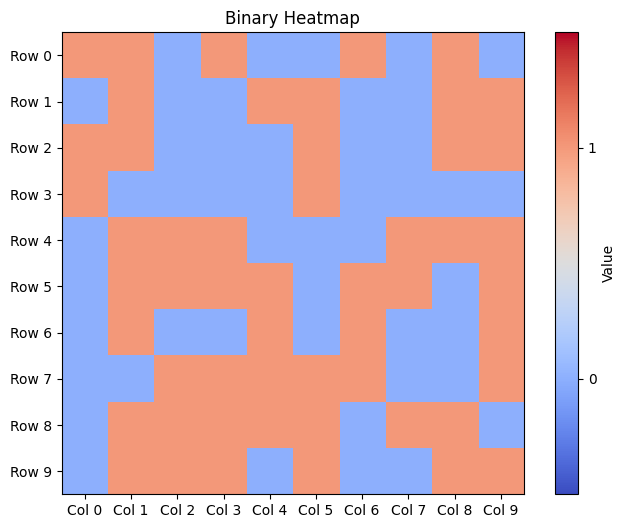

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Create a binary data array (example 10x10)
data = np.random.choice([0, 1], size=(10, 10), p=[0.5, 0.5])

# Create a binary heatmap
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='coolwarm', interpolation='nearest')

# Add color bar
plt.colorbar(ticks=[0, 1], label='Value')
plt.clim(-0.5, 1.5)  # Adjust color limits

# Set ticks and labels
plt.xticks(ticks=np.arange(10), labels=[f'Col {i}' for i in range(10)])
plt.yticks(ticks=np.arange(10), labels=[f'Row {i}' for i in range(10)])

# Set title
plt.title('Binary Heatmap')

# Show the plot
plt.show()